<table>
<td height="150px">
<img src='https://stergioc.github.io/assets/img/logos.png' />
</td>
</table>

#FDL DSBA 2023-2024 Individual Assignment
### **Deadline:** 03/01/2024 @ 23:59
This is an individual assignement. You will be graded in 100 points while two different optional questions will be possible for you to have 20 extra points.

Please fill in the blanks in between the `****START CODE****` and `****END CODE****` lines in the cells, and answer to the questions in Markdown in the first section where you see `ANSWER HERE`.

In order to submit, please rename the file to `FDL_Assignment_<first_name>_<last_name>.ipynb` and upload your solution to Edunao after zipping it.

## Section 1. Getting started **[10 pts]**
Answer these theoretical questions in the `ANSWER HERE` cells.

**1.1**. What is a metric? What is a loss? What is the difference between both, and how are they used in the training process?

**Metric** is function that measures the quality of the model's prediction.It is used for model selesction and model tuning.

**Loss** measures how far the model's preidition is from the actual target values.Normally,we try to minimize the loss funtion of the model.

**Difference**:
A metric measures the model's performance for a task, like accuracy or recall. It's used to evaluate and compare models.
A loss function quantifies the model's errors during training and guides parameter updates.

Metrics assess results; losses drive training.

Metrics are flexible; loss functions must allow for gradient calculation.

Metrics guide model selection post-training while loss functions shape model learning.

1.2. Briefly explain the concept of gradient descent, and how it is used in the training process.

Gradient descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of the steepest descent, as defined by the negative of the gradient.

During training, Gradient descent optimizes a model by adjusting its parameters to minimize the loss function. It computes the gradient, updates parameters in the direction that reduces loss, and iterates this process to improve model accuracy.

1.3. Explain the bias-variance tradeoff problem, and how it is linked with the concept of overfitting and underfitting.

**Bias-variance tradeoff** is a balance between a model's ability to perform well on its training data and its ability to generalize to unseen data.

A good model will find a balance, accurately capturing the underlying patterns in the training data while also generalizing well to new data. This balance helps avoid


1.   overfitting (too low bias and too high variance)
2.   underfitting (too high bias and too low variance).


1.4. What is an activation function, and why is it necessary in order to stack multiple layers?

An **activation function** is a nonlinear function used in neural networks that determines whether a neuron should be activated.

Without activation functions, the output of a neural network, regardless of its depth, would be a linear combination of inputs, severely limiting the network's expressiveness. By introducing non-linear activation functions, networks with multiple layers can learn to approximate more complex functions and non-linear relationships.

1.5. Briefly explain the CNN architecture, and why it is more adapted to images than standard MLP.

A Convolutional Neural Network (CNN) is a deep learning architecture designed for processing and analyzing visual data, It consists of convolutional layers to detect features, pooling layers for dimension reduction, and fully connected layers for classification and loss function, flattening, output layer,etc.

CNNs are better suited for images than standard MLPs because they are designed to efficiently capture spatial patterns, share weights, and build hierarchical features. They are also more parameter-efficient, translation-invariant, and capable of preserving spatial information during downsampling, making them the preferred choice for image-related tasks.

1.6. What is the difference between deep learning and classical machine learning? What are the main advantages of deep learning over more classical techniques?

Deep learning can automatically learn hierarchical data representations, making it suitable for large-scale data and complex patterns, while classical machine learning requires manual feature engineering.

The advantages of deep learning include end-to-end learning, handling complex patterns, automatic feature learning, scalability with large datasets, and achieving state-of-the-art results in many domains.

1.7. Discuss the ethical considerations and potential biases that may arise during a training of a deep learning model. How is it possible to take this into account?

Ethical considerations in deep learning include data bias, fairness, privacy, transparency, and accountability.

Addressing these issues involves diverse data curation, fairness-aware training, privacy-preserving techniques, model explainability, diverse team collaboration, and ongoing monitoring for potential biases.

1.8. Discuss the ethical implications of deploying deep learning models in critical processes.

The ethical implications of deploying deep learning models in critical processes include potential biases, transparency and accountability concerns, privacy risks, and societal impacts.

It's crucial to carefully consider and address these issues to ensure fairness, transparency, and responsible use in critical applications.

1.9. List a couple of methods that you can use to help interpret the classifications of your neural network, and provide a brief explanation of how they work.

Two methods for interpreting neural network classifications are:
1. **Grad-CAM**: Highlights important regions in an image that influenced the network's decision.
2. **LIME**: Builds a locally interpretable model to explain individual predictions by perturbing input data and observing model response changes.

## Section 2. Training a CNN **[40 pts]**
In this section, you will train a CNN on a dataset of [histopathology patches](https://en.wikipedia.org/wiki/Histopathology). This data corresponds to digitized microscopic analysis of tumor tissue, which has been divided into patches. The objective is to classify the patches into the ones containing tumor tissue, and ones not containing any tumor tissue. We will use the [PCAM dataset](https://github.com/basveeling/pcam) which consists of 96x96 pixel patches. We will only use the validation set (which contains 32768 patches and which should take about 0.8 GB of storage) in order to make the training faster.

In [ ]:
import h5py
import random
import numpy as np
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets.utils import download_file_from_google_drive, _decompress

2.1. Download the dataset which is stored in a `.h5` file.
The images can be download from [here](https://drive.google.com/uc?export=download&id=1hgshYGWK8V-eGRy8LToWJJgDU_rXWVJ3), and the labels from [here](https://drive.google.com/uc?export=download&id=1bH8ZRbhSVAhScTS0p9-ZzGnX91cHT3uO). Please then unzip the files and write the paths below. **[1 pt]**

In [ ]:
from torchvision.datasets.utils import download_file_from_google_drive, _decompress

# You can run the following cell to download the files on colab
base_folder = "/content/base_folder/"
archive_name = "camelyonpatch_level_2_split_valid_x.h5.gz"
download_file_from_google_drive("1hgshYGWK8V-eGRy8LToWJJgDU_rXWVJ3", base_folder, filename=archive_name, md5="d5b63470df7cfa627aeec8b9dc0c066e")
_decompress(base_folder + archive_name)

archive_name = "camelyonpatch_level_2_split_valid_y.h5.gz"
download_file_from_google_drive("1bH8ZRbhSVAhScTS0p9-ZzGnX91cHT3uO", base_folder, filename=archive_name, md5="2b85f58b927af9964a4c15b8f7e8f179")
_decompress(base_folder + archive_name)

805965320it [00:20, 39195653.68it/s]


Using downloaded and verified file: /content/base_folder/camelyonpatch_level_2_split_valid_y.h5.gz


'/content/base_folder/camelyonpatch_level_2_split_valid_y.h5'

In [ ]:
# ****START CODE****
IMAGES_PATH = '/content/base_folder/camelyonpatch_level_2_split_valid_x.h5'
LABELS_PATH = '/content/base_folder/camelyonpatch_level_2_split_valid_y.h5'
# ****END CODE****

In [ ]:
images = np.array(h5py.File(IMAGES_PATH)['x'])
labels = np.array([y.item() for y in h5py.File(LABELS_PATH)['y']])

2.2. Now that we have the data, we will want to split it into a training and a validation set. For this, we will write a function which takes in as input the size of the dataset, and which will return the indices of the training set and the indices of the validation set. **[1 pt]**

In [ ]:
random.seed(0)

In [ ]:
labels.shape

(32768,)

In [ ]:
images.shape


(32768, 96, 96, 3)

In [ ]:
def get_split_indices(dataset_length, train_ratio=0.7):
    """
    Function which splits the data into tranining and validation sets.
    arguments:
        dataset_length [int]: number of elements in the dataset
        train_ratio [float]: ratio of the dataset in the training set
    returns:
        train_indices [list]: list of indices in the training set (of size dataset_length*train_ratio)
        val_indices [list]: list of indices in the validation set (of size dataset_length*(1-train_ratio))
    """
    # ****START CODE****
    indices = np.arange(dataset_length)
    np.random.shuffle(indices)

    # Calculate the split index
    split_idx = int(dataset_length * train_ratio)

    # Split the indices into training and validation indices
    train_indices = indices[:split_idx]
    val_indices = indices[split_idx:]

    return train_indices, val_indices

    # ****END CODE****

In [ ]:
train_indices, val_indices = get_split_indices(len(labels))

In [ ]:
print('train_indices',train_indices.shape)
print('val_indices',val_indices.shape)

train_indices (22937,)
val_indices (9831,)


2.3. Write the dataset classes. Feel free to add any type of data augmentation that you like. Please note that pytorch has an implemented PCAM dataset class, but we ask you to code these using from scratch. **[2 pt]**

In [ ]:
class PCAMDataset(Dataset):
    def __init__(self, data, labels, train, transform=None):
        """
        Dataset class for the PCAM dataset.
        Arguments:
            data [numpy.array]: all RGB 96x96 images
            labels [numpy.array]: corresponding labels
            train [bool]: whether the dataset is for training or validation
            transform [Callable, optional]: optional transform to be applied on a sample
        """
        super(PCAMDataset, self).__init__()
        self.data = data
        self.labels = labels
        self.train = train
        self.transform = transform

        if self.train:
            self.augmentation = transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
            ])
        else:
            self.augmentation = transforms.Compose([])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.labels[idx]

        # Converting NumPy Arrays to PIL Images
        image = Image.fromarray(image)

        # apply augmentation
        if self.train and self.augmentation:
            image = self.augmentation(image)

        # convert to PyTorch tensor
        image = transforms.ToTensor()(image)

        label = torch.tensor(label, dtype=torch.long)

        return image, label

In [ ]:
# ****START CODE****
BATCH_SIZE = 32
# ****END CODE****

In [ ]:
train_dataset = PCAMDataset(images[train_indices], labels[train_indices], train=True)
val_dataset = PCAMDataset(images[val_indices], labels[val_indices], train=False)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

2.4 Display a random sample of images that have a label of 0 (not containing
any tumor tissue) and 1 (containing tumor tissue). **[2 pt]**

Can you identify the features in a particular image which cause it to be classified as having tumor tissue or not?

(Extra: See if you can display a random sample of images without looking at the label, and then try to classify it as containing tumor tissue or not - then check your answer afterwards)

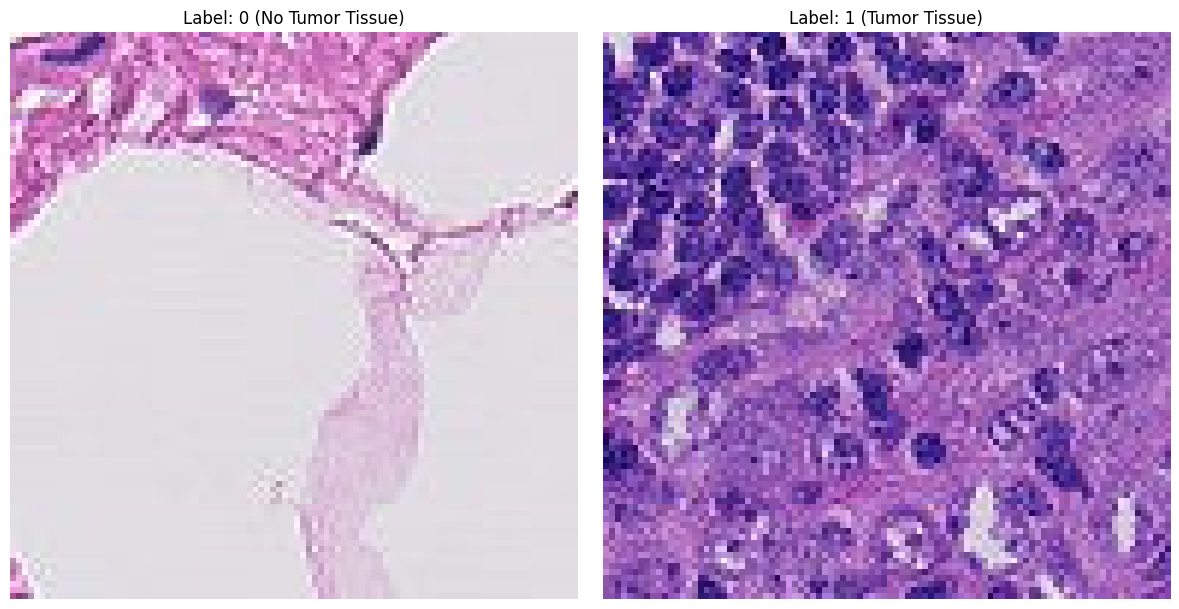

In [ ]:
import matplotlib.pyplot as plt
# Select a random sample of images with label 0 (no tumor tissue)
random_idx_0 = np.random.choice(np.where(labels == 0)[0], replace=False)

# Select a random sample of images with label 1 (tumor tissue)
random_idx_1 = np.random.choice(np.where(labels == 1)[0], replace=False)

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(images[random_idx_0])
plt.title(f"Label: {labels[random_idx_0]} (No Tumor Tissue)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(images[random_idx_1])
plt.title(f"Label: {labels[random_idx_1]} (Tumor Tissue)")
plt.axis('off')
plt.tight_layout()
plt.show()

#From the plot, we can deduce that the features in a particular image
#which cause it to be classified as having tumor tissue include
# cell density, nuclei size and shape, color and texture,
#and the presence of mitotic figures, among others.

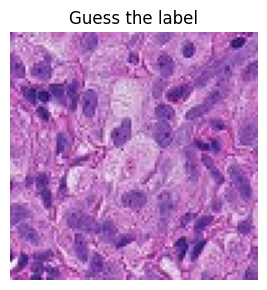

In [ ]:
# Select a random sample of images

random_indices = np.random.choice(len(images), replace=False)

# Display the images
plt.figure(figsize=(15, 3))
plt.imshow(images[random_indices])
plt.title(f"Guess the label")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Ask for guess
user_guess = input("Guess the label (enter 1 for tumor tissue and 0 otherwise): ")

Guess the label (enter 1 for tumor tissue and 0 otherwise): 1


In [ ]:
# Check if the user's guess is correct
correct_label = labels[random_indices]
if int(user_guess) == correct_label:
    print("Correct! Your guess matches the label.")
else:
    print("Incorrect. The actual label is {}.".format(correct_label))


Correct! Your guess matches the label.


2.5. Plot the distribution of class labels in the training and validation datasets, to see how well the classes are balanced. **[1 pt]**

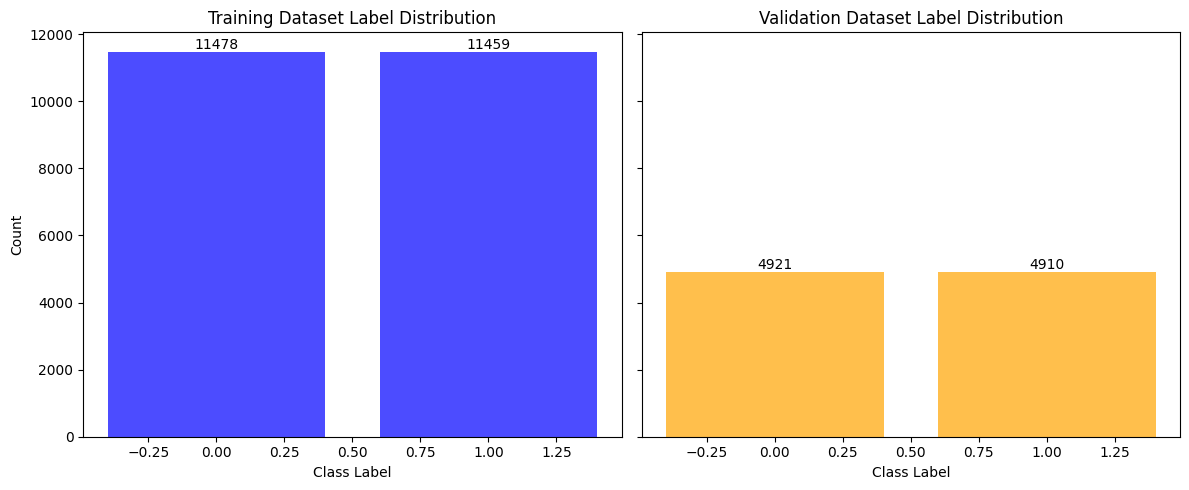

In [ ]:
train_labels = labels[train_indices]
val_labels = labels[val_indices]
# Calculate the distribution of class labels
train_label_counts = np.bincount(train_labels)
val_label_counts = np.bincount(val_labels)
labels_unique = np.arange(max(len(train_label_counts), len(val_label_counts)))

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # Share y-axis for better comparison

# Plot for training labels
axs[0].bar(labels_unique, train_label_counts, color='blue', alpha=0.7)
axs[0].set_title('Training Dataset Label Distribution')
axs[0].set_xlabel('Class Label')
axs[0].set_ylabel('Count')

for i, count in enumerate(train_label_counts):
    axs[0].text(i, count, str(count), ha='center', va='bottom')

# Plot for validation labels
axs[1].bar(labels_unique, val_label_counts, color='orange', alpha=0.7)
axs[1].set_title('Validation Dataset Label Distribution')
axs[1].set_xlabel('Class Label')

for i, count in enumerate(val_label_counts):
    axs[1].text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Distribution of class labels in the training and validation datasets are well balanced

2.6. Write your model architecture, you can be creative here! Here is a (non exhaustive) list of some useful documentations you could want to use [Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html), [LayerNorm](https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html), [activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity). Justify your choice of architecture. **[5 pts]**

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # ****START CODE****
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer Normalization
        self.norm1 = nn.LayerNorm([128, 24, 24])  # Assuming input images are 96x96

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 24 * 24, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 2)  # Output layer with 2 outputs for binary classification

        # Activation function
        self.relu = nn.ReLU()

        # ****END CODE****

    def forward(self, x):
        # ****START CODE****
        # Applying convolutions and activation function
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))

        # Apply LayerNorm
        x = self.norm1(x)

        # Flattening the output for the fully connected layers
        x = torch.flatten(x, 1)

        # Applying fully connected layers and activation function
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        # ****END CODE****
        return x

In [ ]:
model = ConvNet()

2.7. Initialize the training hyperparameters (optimizer, criterion, ...). Code the whole training loop, where the model is validated after each epoch, and where the essential information is output (training and validation loss and metric). For the metric you may want to use the [torchmetrics library](https://lightning.ai/docs/torchmetrics/stable/). **[5 pts]**

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 6.6 MB/s eta 0:00:00


In [ ]:
import torch

#Use GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available.")
else:
    device = torch.device("cpu")
    print("CUDA is not available.")
model = ConvNet().to(device)

CUDA is available.


In [ ]:
import torch.optim as optim
import torchmetrics

# ****START CODE****
lr = 0.001
num_epochs = 25
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
metric = torchmetrics.Accuracy(task='binary').to(device)
# ****END CODE****

Train model and validate it after each epoch. Feel free to use a GPU if you're training on colab to speed up your training.

In [ ]:
# ****START CODE****

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_acc = 0
    train_loss = 0
    for batch in train_dataloader:
        inputs, targets = batch
        targets = targets.long()
        inputs, targets = inputs.to(device), targets.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Update metrics
        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        train_acc += metric(preds, targets).item()

    # Validation loop
    model.eval()
    val_acc = 0
    val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            inputs, targets = batch
            targets = targets.long()
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            val_loss += loss.item()

            # Convert output to predicted categories
            preds = torch.argmax(outputs, dim=1)
            val_acc += metric(preds, targets).item()

    # Calculate average losses and accuracy
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    val_loss /= len(val_dataloader)
    val_acc /= len(val_dataloader)

    # Print metrics
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')

# Save the model after training
torch.save(model.state_dict(), 'model_weights.pth')
# ****END CODE****

In [ ]:
best_val_loss = float('inf')
patience = 3  # set patience parameter
trigger_times = 0

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_acc = 0
    train_loss = 0
    for batch in train_dataloader:
        inputs, targets = batch
        targets = targets.long()
        inputs, targets = inputs.to(device), targets.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Update metrics
        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        train_acc += metric(preds, targets).item()

    # Validation loop
    model.eval()
    val_acc = 0
    val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            inputs, targets = batch
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            val_acc += metric(preds, targets).item()

    # Calculate average losses and accuracy
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    val_loss /= len(val_dataloader)
    val_acc /= len(val_dataloader)

    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')

    # early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

# Save the model after training
torch.save(model.state_dict(), 'model_weights.pth')

# ****END MODIFIED CODE****

Epoch [1/25]
Train Loss: 0.4518, Train Accuracy: 0.7812
Val Loss: 0.4123, Val Accuracy: 0.8173
Epoch [2/25]
Train Loss: 0.4100, Train Accuracy: 0.8106
Val Loss: 0.3787, Val Accuracy: 0.8329
Epoch [3/25]
Train Loss: 0.3789, Train Accuracy: 0.8277
Val Loss: 0.3631, Val Accuracy: 0.8430
Epoch [4/25]
Train Loss: 0.3673, Train Accuracy: 0.8349
Val Loss: 0.3708, Val Accuracy: 0.8365
Epoch [5/25]
Train Loss: 0.3333, Train Accuracy: 0.8542
Val Loss: 0.3340, Val Accuracy: 0.8660
Epoch [6/25]
Train Loss: 0.3046, Train Accuracy: 0.8723
Val Loss: 0.3105, Val Accuracy: 0.8640
Epoch [7/25]
Train Loss: 0.2712, Train Accuracy: 0.8856
Val Loss: 0.3004, Val Accuracy: 0.8787
Epoch [8/25]
Train Loss: 0.2728, Train Accuracy: 0.8877
Val Loss: 0.2564, Val Accuracy: 0.8975
Epoch [9/25]
Train Loss: 0.2384, Train Accuracy: 0.9045
Val Loss: 0.2366, Val Accuracy: 0.9062
Epoch [10/25]
Train Loss: 0.2175, Train Accuracy: 0.9137
Val Loss: 0.2201, Val Accuracy: 0.9132
Epoch [11/25]
Train Loss: 0.2017, Train Accuracy:

2.8. Validate your model, show that it is not overfitting. Justify your choice of metric. Answer this either with code or Markdown (or both). **[3 pts]**

The model is not overfitting,since early stopping is added based on validation performance to my original model to prevent overfitting.

The class is balanced,therefore accuracy is a valid metric.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Moving model to evaluation mode
model.eval()

# Lists to store targets and predictions
all_targets = []
all_preds = []

with torch.no_grad():
    for batch in val_dataloader:
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)

        all_targets.extend(targets.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Converting lists to arrays
all_targets = np.array(all_targets)
all_preds = np.array(all_preds)

# Calculating metrics
accuracy = accuracy_score(all_targets, all_preds)
precision = precision_score(all_targets, all_preds)
recall = recall_score(all_targets, all_preds)
f1 = f1_score(all_targets, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9217
Precision: 0.9373
Recall: 0.9052
F1 Score: 0.9210



The results from the model validation suggest good performance across several key metrics, which is promising in terms of generalization and indicates that the model is not significantly overfitting.

2.9. Try to optimize three hyperparameters (the learning rate, the batch size and the number of layers in your CNN model), does it improve the performance of your model? Anwser with a graph and comment on the result. Answer this with code and Markdown. **[8 pts]**

To do so, use bayesian optimization to find the best set of hyperparameters using the library `scikit-optimize`.

In [ ]:
!pip install scikit-optimize # Run this cell to import the library in colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
from skopt import gp_minimize
from skopt.utils import use_named_args
from skopt.space import Real, Integer,Categorical

In [ ]:
# Retrieve the best set of hyperparameters using bayesian optimization.
# Declare search space for your set of hyperparameters (you may take a look here: https://scikit-optimize.github.io/stable/modules/space.html#space)
# ****START CODE****
dimensions = [
    Categorical([1e-5, 1e-4, 1e-3], name="learning_rate"),
    Categorical([16, 32, 64], name="batch_size"),
    Integer(3, 5, name="num_layers")] # list of your search spaces
parameters_default_values = [1e-3, 32, 3] # default value for each parameter for initialization
# ****END CODE****

In [ ]:
# change convnet so that num_layers are adjustable
class ConvNet(nn.Module):
    def __init__(self, num_layers):
        super(ConvNet, self).__init__()
        layers = []

        in_channels = 3
        for i in range(num_layers):
            out_channels = 32 * (2 ** i)
            layers.append(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, padding=1))
            layers.append(nn.ReLU())
            layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
            in_channels = out_channels

        self.conv_layers = nn.Sequential(*layers)
        self.fc_input_features = out_channels * (96 // 2**num_layers) ** 2
        self.norm1 = nn.LayerNorm([out_channels, 96 // 2**num_layers, 96 // 2**num_layers])
        self.fc1 = nn.Linear(self.fc_input_features, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 2)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.norm1(x)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def build_model(num_layers):
    return ConvNet(num_layers)

In [ ]:
# Create a function that take as input set of hyperparameters and return a score to be minimized (choose wisely your scoring function)
@use_named_args(dimensions=dimensions)
def fit_opt(learning_rate, batch_size, num_layers):
    batch_size = int(batch_size)
    # Create the model
    model = ConvNet(num_layers)  # Assuming your ConvNet class can be adjusted based on the number of layers

    # Set up the optimizer
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Data Loaders
    # Note: You need to adjust the training and validation data loaders based on the new batch size
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

    # Train the model (simplified here for illustration)
    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in train_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Validate the model and calculate the score
    val_loss = 0
    model.eval()
    with torch.no_grad():
        for inputs, targets in val_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    # Calculate the average validation loss
    score = val_loss / len(val_dataloader)

    return score


In [ ]:
# Use gp_minize to retrieve the optimal values (you may take a look here: https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html?highlight=gp_minimize#skopt.gp_minimize)

gp_result = gp_minimize(
    func=fit_opt,                # Objective function
    dimensions=dimensions,       # Defined search space
    acq_func='EI',               # Acquisition function, default is 'EI'
    n_calls=50,                  # Total number of iterations to run
    n_random_starts=10,          # Number of initial random search iterations
    noise=0.1**2,                # Assumed noise level of the objective function
    random_state=42              # Random number generator seed
)

print(f"Optimal set of parameters found at iteration {np.argmin(gp_result.func_vals)}")
print(gp_result.x)

2.10. OPTIONAL QUESTION. Implement a ViT and compare the results obtained in the previous section in a table. **[10 extra pts]**

In [ ]:
# ****START CODE****
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Initialize the feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224', num_labels=2)  # 假设是二分类问题

# img transfrmation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

#Train VIT
def train(model, train_loader, val_loader, epochs=5, learning_rate=1e-4):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        for batch in train_loader:
            images, labels = batch
            images = feature_extractor(images=images, return_tensors="pt").pixel_values.squeeze().to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    return model

trained_vit_model = train(model, train_loader, val_loader)

# ****END CODE****

In [ ]:
def evaluate(model, data_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    all_preds = []
    all_labels = []
    total_loss = 0
    criterion = torch.nn.CrossEntropyLoss()

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            if isinstance(model, ViTForImageClassification):
                logits = outputs.logits
            else:
                logits = outputs

            loss = criterion(logits, labels)
            total_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='binary')
    recall = recall_score(all_labels, all_preds, average='binary')
    f1 = f1_score(all_labels, all_preds, average='binary')

    avg_loss = total_loss / len(data_loader)

    return accuracy, avg_loss, precision, recall, f1


In [ ]:
# Evaluate CNN
cnn_accuracy, cnn_loss, cnn_precision, cnn_recall, cnn_f1 = evaluate(cnn_model, test_loader)

# Evaluate ViT
vit_accuracy, vit_loss, vit_precision, vit_recall, vit_f1 = evaluate(vit_model, test_loader)

print("CNN vs ViT Performance Comparison")
print(f"{'Model':<10}{'Accuracy':<10}{'Loss':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}")
print(f"{'CNN':<10}{cnn_accuracy:<10.2f}{cnn_loss:<10.2f}{cnn_precision:<10.2f}{cnn_recall:<10.2f}{cnn_f1:<10.2f}")
print(f"{'ViT':<10}{vit_accuracy:<10.2f}{vit_loss:<10.2f}{vit_precision:<10.2f}{vit_recall:<10.2f}{vit_f1:<10.2f}")


2.11. With the exception of using Saliency maps, use one other interpretability method you listed in part 1.9 to investigate how your model made its classifications. **[12 pts]**

How does your chosen method probe the classifications of your model? Do the results make sense?

With respect to the code block below, saliency maps are useful in interpreting the decisions of CNNs. However, they have some limitations. After completing and running the code block below, list some of these limitations, given the results you observe on applying saliency maps to your images.

In the following code,I will use **Grad-CAM** to highlight important regions in an image that influenced the network's decision.

**How Grad-CAM Probes Classifications:**
Grad-CAM works by using the gradients of any target concept flowing into the final convolutional layer of a CNN to produce a coarse localization map highlighting the important regions in the image for predicting the concept.

**Compared to Saliency Map**, Grad-CAM provides more precise localization, it is able to determine not only which regions have an impact on the decision, but also which feature maps contribute to the decision, and therefore are better able to explain the model's decisions.

**Make Sense** as:
1. Highlighted regions correspond to the pathologically significant areas.
2.Highlighted areas align with known indicators of the medical condition or tissue state that the model is trained to detect.

<ipython-input-57-e7b1cd67a6f4>:72: DeprecationWarning: LINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use BILINEAR or Resampling.BILINEAR instead.
  grad_cam_resized = np.array(Image.fromarray(grad_cam.numpy()).resize((img_original.shape[1], img_original.shape[0]), Image.LINEAR))


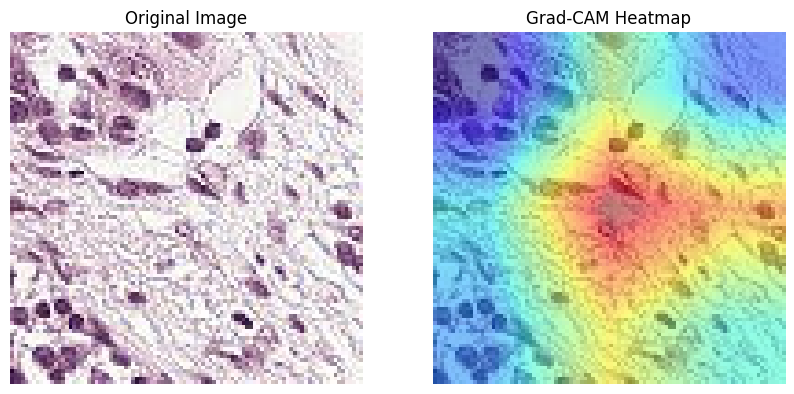

In [ ]:
import torchvision.models as models
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the model
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
model.eval()
model.to('cuda')

# Define the preprocess steps
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
index_k = random.randint(0, len(images) - 1)
img = images[index_k]
img_tensor = preprocess(img).unsqueeze(0).to('cuda')


# We register hooks on the activations and gradients
activations = {}
gradients = {}

def forward_hook(module, input, output):
    activations['value'] = output

def backward_hook(module, grad_input, grad_output):
    gradients['value'] = grad_output[0]

# Register hooks on the last layer
layer = model.layer4[-1]
layer.register_forward_hook(forward_hook)
layer.register_full_backward_hook(backward_hook)

# Forward pass
output = model(img_tensor)

# Backward pass for the class index
output.max().backward()

# Get the activations and gradients
activation = activations['value']
gradient = gradients['value']

# Global Average Pooling of gradients
pooled_gradients = torch.mean(gradient, [0, 2, 3])

# Weight the activations with the gradients
for i in range(pooled_gradients.size(0)):
    activation[:, i, :, :] *= pooled_gradients[i]

# Average across the channels to get the final Grad-CAM
grad_cam = torch.mean(activation, dim=1).squeeze().cpu()

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

img_original = np.clip(img_tensor.squeeze().cpu().detach().numpy().transpose((1, 2, 0)) * std + mean, 0, 1)
img_pil = Image.fromarray(images[index_k])
img_tensor = preprocess(img_pil).unsqueeze(0).to('cuda')
# Apply ReLU
grad_cam = F.relu(grad_cam)

# Normalize the Grad-CAM
grad_cam = grad_cam / grad_cam.max()

img_original = np.array(img_pil)
grad_cam = grad_cam.detach().cpu()

grad_cam_resized = np.array(Image.fromarray(grad_cam.numpy()).resize((img_original.shape[1], img_original.shape[0]), Image.LINEAR))

# Plot the original image and the Grad-CAM heatmap
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img_original)
plt.title('Original Image')
plt.axis('off')

# Plot the heatmap overlay
plt.subplot(1, 2, 2)
plt.imshow(img_original)
plt.imshow(grad_cam_resized, cmap='jet', alpha=0.5)  # Overlay heatmap
plt.title('Grad-CAM Heatmap')
plt.axis('off')

plt.show()

(-0.5, 95.5, 95.5, -0.5)

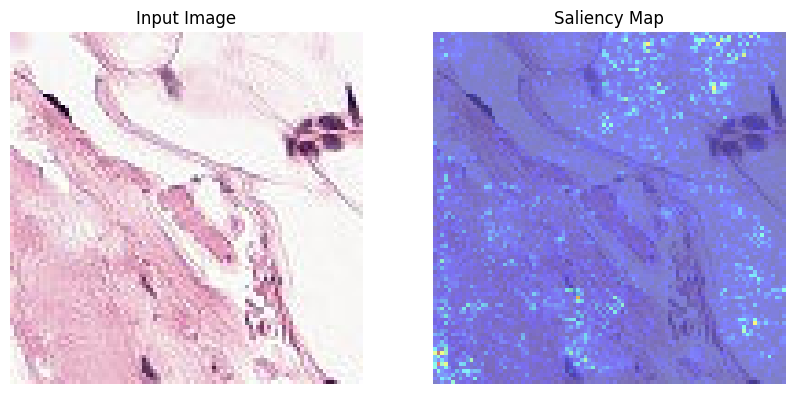

In [ ]:
## Code block to use saliency maps
### START CODE

# Choose a particular image and corresponding label in which to investigate the classifications of the network
index_k = random.randint(0, len(images) - 1)
image = images[index_k]
label = labels[index_k]

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
              ]) ### Here put the transforms to be applied

input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension
### END CODE

# Set the model to evaluation mode
model = model.to(device)
model.eval()

# Set the requires_grad attribute of the input tensor to True for gradients
input_tensor = preprocess(image).unsqueeze(0).to(device)
input_tensor.requires_grad_(True)

# Forward pass to get the model prediction
### START CODE
output = model(input_tensor)
### END CODE

# Choose the class index for which you want to visualize the saliency map
class_index = torch.argmax(output)

model.zero_grad()

# Backward pass to get the gradients of the output w.r.t the input
output[0, class_index].backward()

# Get the gradients from the input tensor
saliency_map = input_tensor.grad.squeeze(0).abs().cpu().numpy()

# Normalize the saliency map for visualization (optional)
saliency_map = saliency_map / saliency_map.max()

normalized_saliency_map = (saliency_map - saliency_map.min()) / (saliency_map.max() - saliency_map.min())

# Convert the saliency map back to a uint8 image format (0-255)
saliency_map_image = np.uint8(255 * normalized_saliency_map)

# Aggregate across the channels
aggregate_saliency = saliency_map.sum(axis=0)

# Plot the input image and its corresponding saliency map side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the input image
axes[0].imshow(image)
axes[0].set_title('Input Image')
axes[0].axis('off')

# Plot the saliency map
axes[1].imshow(aggregate_saliency, cmap='jet', alpha=0.7)  # Overlay saliency map on the input image
axes[1].imshow(image, alpha=0.3)  # Overlay input image for comparison
axes[1].set_title('Saliency Map')
axes[1].axis('off')

Based on the saliency map, some limitations are:

1. **Noise and Clutter**: The saliency map appears noisy, making it hard to identify which features are truly important for the model's decision.

2. **Lack of Clear Interpretation**: Bright areas on the map indicate regions of interest, but it's unclear what these regions represent—whether they're actual features or just artifacts.

3. **Misleading Highlights**: The saliency map may highlight edges or textures rather than the semantic parts of the image that a human would consider important for the classification task.

4. **Lack of Context**: The map focuses on specific regions without considering the global context of the image, which can be misleading for understanding the model's reasoning.

These observations suggest that while saliency maps can provide insights into what the model is looking at, they should be interpreted with caution and not taken as a definitive explanation of model behavior.


## Section 3. Implementing a CycleGAN **[50 pt]**

In this part, we will implement CycleGAN using PyTorch. We will train a model to translate images of apples to oranges and vice versa.

The CycleGAN model is composed of two generators and two discriminators. The generators are responsible for translating images from one domain to another, while the discriminators are responsible for distinguishing between translated images and real images. The generators and discriminators are trained in an adversarial manner, where the generators try to fool the discriminators and the discriminators try to distinguish between real and fake images. You can see an overview of the CycleGAN model in the figure below:
<img src="https://junyanz.github.io/CycleGAN/images/cyclegan_blogs.jpg">

You can refer to the [CycleGAN paper](https://arxiv.org/pdf/1703.10593.pdf) for more information.

You can first retrieve the data by executing the following cells:

In [ ]:
!wget https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/datasets/download_cyclegan_dataset.sh?raw=true

In [ ]:
!mkdir datasets
!bash ./download_cyclegan_dataset.sh?raw=true apple2orange

### 1) Dataset creation

In [3]:
import os
import gc
import random
import torch
import torch.utils.data as data
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from PIL import Image
from torch.optim import lr_scheduler
from IPython.display import clear_output
from torch.utils.data import Subset

Some useful functions that we will use later:

In [28]:
def denormalize(images, std=0.5, mean=0.5):
    # For plot
    images = (images * std) + mean
    return images

def deprocess(input_tensor):
    if len(input_tensor.shape) == 3:
        return np.transpose(denormalize(input_tensor.to(device).cpu()), (1, 2, 0))
    elif len(input_tensor.shape) == 4:
        return np.transpose(denormalize(input_tensor.to(device).cpu()), (0, 2, 3, 1))

3.1.1. You will now implement a simple dataset class in order to load the images. The dataset class should load the images from the dataset folder and apply the input transformations **[1 pt]**:

In [5]:
class GeneratorDataset(data.Dataset):

    def __init__(self, root_dir, transform=None):
        # ****START CODE****
        self.root_dir = root_dir
        self.transform = transform
        self.filenames = os.listdir(root_dir)

        # ****END CODE****

    def __len__(self):
        # ****START CODE****
        return len(self.filenames)
        # ****END CODE****

    def __getitem__(self, idx):
        # ****START CODE****
        img_name = os.path.join(self.root_dir, self.filenames[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image
        # ****END CODE****

We will now create the dataset objects for the training and testing sets:

In [6]:
DATASET = 'apple2orange'
DATASET_PATH = os.path.join("datasets", DATASET) # Dataset path
OUTPUT_PATH = 'outputs'
base_logdir = os.path.join("logs", 'pytorch') # Sets up a log directory.
RESIZE_SHAPE = 128 # Resized image size for faster training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create the dataset objects
preprocess_train_transformations = transforms.Compose([
                               transforms.Resize(RESIZE_SHAPE),
                               transforms.RandomHorizontalFlip(p=0.5),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ])

preprocess_test_transformations = transforms.Compose([
                               transforms.Resize(RESIZE_SHAPE),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ])

train_data_X = GeneratorDataset(root_dir=os.path.join(DATASET_PATH, "trainA"),
                           transform=preprocess_train_transformations)

train_data_Y = GeneratorDataset(root_dir=os.path.join(DATASET_PATH, "trainB"),
                           transform=preprocess_train_transformations)

test_data_X = GeneratorDataset(root_dir=os.path.join(DATASET_PATH, "testA"),
                           transform=preprocess_test_transformations)

test_data_Y = GeneratorDataset(root_dir=os.path.join(DATASET_PATH, "testB"),
                           transform=preprocess_test_transformations)

print("Found {} images in {}".format(len(train_data_X), 'trainA'))
print("Found {} images in {}".format(len(train_data_Y), 'trainB'))
print("Found {} images in {}".format(len(test_data_X), 'testA'))
print("Found {} images in {}".format(len(test_data_Y), 'testB'))

Found 995 images in trainA
Found 1019 images in trainB
Found 266 images in testA
Found 248 images in testB


In order to speed up the training process, we will use a subset of the training data:

In [7]:
random.seed(2)

N_IMAGES_TO_SAMPLE = 400

indices_X = random.sample(range(len(train_data_X)), N_IMAGES_TO_SAMPLE)
indices_Y = random.sample(range(len(train_data_Y)), N_IMAGES_TO_SAMPLE)

train_data_X = Subset(train_data_X, indices_X)
train_data_Y = Subset(train_data_Y, indices_Y)

### 2) Generator and Discriminator Models

3.2.1) We will now implement the backbone for the generator and the discriminator. You are asked to complete the code for the ResidualBlock of the generator backbone **[4 pt]**:

In [8]:
##############################
#           RESNET
##############################


class ResidualBlock(nn.Module):
    def __init__(self, in_features):
        # ****START CODE****
        super(ResidualBlock, self).__init__()

        # implement the internal layers of the residual block.
        self.block = nn.Sequential(
            nn.Conv2d(in_features, in_features, kernel_size=3, stride=1, padding=1, bias=False),
            nn.InstanceNorm2d(in_features),
            nn.ReLU(inplace=False),
            nn.Conv2d(in_features, in_features, kernel_size=3, stride=1, padding=1, bias=False),
            nn.InstanceNorm2d(in_features)
        )
        # ****END CODE****

    def forward(self, x):
        # ****START CODE****
        # Apply the residual block, and add the input x (identity shortcut)
        # to the output of the block (element-wise addition)
        return x.clone() + self.block(x)
        # ****END CODE****


class GeneratorResNet(nn.Module):
    def __init__(self, input_channel, n_blocks, filters, output_channel):
        super(GeneratorResNet, self).__init__()

        # Initial convolution block
        model = [
            nn.ReflectionPad2d(input_channel),
            nn.Conv2d(input_channel, filters, 7),
            nn.InstanceNorm2d(filters),
            nn.ReLU(inplace=False),
        ]
        in_features = filters

        # Downsampling
        for _ in range(2):
            filters *= 2
            model += [
                nn.Conv2d(in_features, filters, 3, stride=2, padding=1),
                nn.InstanceNorm2d(filters),
                nn.ReLU(inplace=False),
            ]
            in_features = filters

        # Residual blocks
        for _ in range(n_blocks):
            model += [ResidualBlock(filters)]

        # Upsampling
        for _ in range(2):
            filters //= 2
            model += [
                nn.Upsample(scale_factor=2),
                nn.Conv2d(in_features, filters, 3, stride=1, padding=1),
                nn.InstanceNorm2d(filters),
                nn.ReLU(inplace=False),
            ]
            in_features = filters

        # Output layer
        model += [nn.ReflectionPad2d(output_channel), nn.Conv2d(filters, output_channel, 7), nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, x):
        return self.model(x)


##############################
#        Discriminator
##############################


class Discriminator(nn.Module):
    def __init__(self, input_channel, filters):
        super(Discriminator, self).__init__()

        def discriminator_block(in_filters, out_filters, normalize=True):
            """Returns downsampling layers of each discriminator block"""
            layers = [nn.Conv2d(in_filters, out_filters, 4, stride=2, padding=1)]
            if normalize:
                layers.append(nn.InstanceNorm2d(out_filters))
            layers.append(nn.LeakyReLU(0.2, inplace=False))
            return layers

        self.model = nn.Sequential(
            *discriminator_block(input_channel, filters, normalize=False),
            *discriminator_block(filters, filters * 2),
            *discriminator_block(filters * 2, filters * 4),
            *discriminator_block(filters * 4, filters * 8),
            nn.ZeroPad2d((1, 0, 1, 0)),
            nn.Conv2d(filters * 8, 1, 4, padding=1)
        )

    def forward(self, img):
        return self.model(img)


We will now instantiate the generator and discriminator models:

In [9]:
G_XtoY = GeneratorResNet(input_channel=3, output_channel=3, filters=64, n_blocks=9).to(device)
G_YtoX = GeneratorResNet(input_channel=3, output_channel=3, filters=64, n_blocks=9).to(device)

In [10]:
Dx = Discriminator(input_channel=3, filters=64).to(device)
Dy = Discriminator(input_channel=3, filters=64).to(device)

3.2.2) You will now implement a function to randomly initialize the weights for all the convolutional layers in the generators and the discriminators with values sampled from a normal distribution (mean=0.0, std=0.02), and initialize their bias to 0.0. You need to complete the code of the *weights_init_normal* function and apply it to the models **[5 pt]**:

In [11]:
def weights_init_normal(m):
    # ****START CODE****
    classname = m.__class__.__name__
    # For every Convolution layer in a model
    if classname.find('Conv') != -1:
        # Apply a normal distribution to the weights and a zero bias
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        if m.bias is not None:
            nn.init.constant_(m.bias.data, 0.0)
    # Also initialize the weights for Transposed Convolution layers and InstanceNorm2d
    elif classname.find('BatchNorm2d') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0.0)
    # ****END CODE****

# ============================
# Initialize the values of the models
# ============================
# Initialize the values of the two generators
# ****START CODE****
G_XtoY.apply(weights_init_normal)
G_YtoX.apply(weights_init_normal)
# ****END CODE****
# Initialize the values of the two discriminators
# ****START CODE****
Dx.apply(weights_init_normal)
Dy.apply(weights_init_normal)
# ****END CODE****

Discriminator(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (10): LeakyReLU(negative_slope=0.2)
    (11): ZeroPad2d((1, 0, 1, 0))
    (12): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  )
)

### 3) Training

We will define the hyperparameters used for training our CycleGAN model. The model should run on the T4 GPU provided by Google Colab. You may need to adjust the batch size to fit the model on other GPUs:

In [12]:
BATCH_SIZE = 10
EPOCHs = 30
SAVE_EVERY_N_EPOCH = 5
LR = 0.0002
BETAS = (0.5, 0.999)

We will now define the data loaders for the training and testing sets:

In [29]:
train_image_loader_X = torch.utils.data.DataLoader(train_data_X, batch_size=BATCH_SIZE,
                                                    shuffle=True, num_workers=0)
train_image_loader_Y = torch.utils.data.DataLoader(train_data_Y, batch_size=BATCH_SIZE,
                                         shuffle=True, num_workers=0)
test_image_loader_X = torch.utils.data.DataLoader(test_data_X, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=0)
test_image_loader_Y = torch.utils.data.DataLoader(test_data_Y, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=0)

We will now extract some images from the test set to visualize the model's performance during training:

In [39]:
id_sample_X = test_data_X.filenames.index("n07740461_11391.jpg")
id_sample_Y = test_data_Y.filenames.index("n07749192_10081.jpg")

sample_X = test_data_X[id_sample_X]
sample_Y = test_data_Y[id_sample_Y]

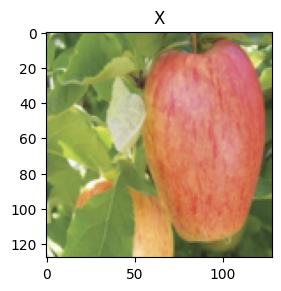

In [40]:
plt.subplot(121)
plt.title('X')
plt.imshow(deprocess(sample_X))

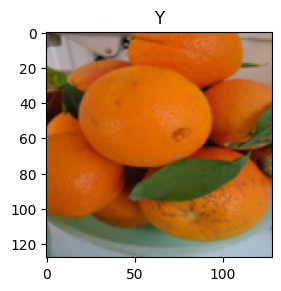

In [41]:
plt.subplot(121)
plt.title('Y')
plt.imshow(deprocess(sample_Y))

3.3.1. You will now define the optimizers and schedulers for the generator and discriminator models **[3 pts]**:

In [33]:
# ****START CODE****

# Using Adam optimizer for both generator and discriminator
G_XtoY_optimizer = torch.optim.Adam(G_XtoY.parameters(), lr=LR, betas=BETAS)
G_YtoX_optimizer = torch.optim.Adam(G_YtoX.parameters(), lr=LR, betas=BETAS)
Dx_optimizer = torch.optim.Adam(Dx.parameters(), lr=LR, betas=BETAS)
Dy_optimizer = torch.optim.Adam(Dy.parameters(), lr=LR, betas=BETAS)
# Decay the learning rate by half every 10 epochs
scheduler_G_XtoY = torch.optim.lr_scheduler.StepLR(G_XtoY_optimizer, step_size=10, gamma=0.5)
scheduler_G_YtoX = torch.optim.lr_scheduler.StepLR(G_YtoX_optimizer, step_size=10, gamma=0.5)
scheduler_D_X = torch.optim.lr_scheduler.StepLR(Dx_optimizer, step_size=10, gamma=0.5)
scheduler_D_Y = torch.optim.lr_scheduler.StepLR(Dy_optimizer, step_size=10, gamma=0.5)

# ****END CODE****

We will now implement the different loss functions used in CycleGANs:

In [34]:
SOFT_FAKE_LABEL_RANGE =  [0.0, 0.3] # The label of fake label will be generated within this range.
SOFT_REAL_LABEL_RANGE = [0.7, 1.2] # The label of real label will be generated within this range.

The discriminator loss is defined by:
\begin{equation}
\mathcal{L}_{D} = \frac{1}{2} (\mathbb{E}_{y \sim p_{data}(y)}[(D_Y(y) - r_2)^2] + \mathbb{E}_{x \sim p_{data}(x)}[(D_Y(G_{XY}(x))-r_1)^2]) + \frac{1}{2} (\mathbb{E}_{x \sim p_{data}(x)}[(D_X(x) - r_2)^2] + \mathbb{E}_{y \sim p_{data}(y)}[(D_X(G_{YX}(y))-r_1)^2])
\end{equation}
with $p_{data}(x)$ being the distribution of images from the first domain, $p_{data}(y)$ being the distribution of images from the second domain, $G_{XY}$ and $G_{YX}$ being the two generators, $D_X$ and $D_Y$ the two discriminators, and $r_1$ and $r_2$ being the soft fake and real labels chosen from a uniform distribution within the ranges $[0.0, 0.3]$ and $[0.7, 1.2]$ respectively.

3.3.2. You will now implement the discriminator loss function **[4 pts]**:

In [19]:
def discriminator_loss(real_image, generated_image):
    # ****START CODE****
    # Soft labels
    r1 = torch.empty(real_image.size(0), 1, 1, 1).uniform_(0.0, 0.3).to(real_image.device)
    r2 = torch.empty(real_image.size(0), 1, 1, 1).uniform_(0.7, 1.2).to(real_image.device)

    # Generate fake images
    with torch.no_grad():  # Ensure no gradient is computed for the generators
        fake_x = G_XtoY(real_image)
        fake_y = G_YtoX(real_image)

    # Loss for real images
    real_loss_Dy = ((Dy(real_image) - r2) ** 2).mean()
    real_loss_Dx = ((Dx(real_image) - r2) ** 2).mean()

    # Loss for generated images
    fake_loss_Dy = ((Dy(fake_x) - r1) ** 2).mean()
    fake_loss_Dx = ((Dx(fake_y) - r1) ** 2).mean()

    # Total loss
    loss = 0.5 * (real_loss_Dy + fake_loss_Dy) + 0.5 * (real_loss_Dx + fake_loss_Dx)
    # ****END CODE****
    return loss

The generator loss is defined by:
\begin{equation}
\mathcal{L}_{G} = \mathbb{E}_{x \sim p_{data}(x)}(D_Y(G_{XY}(x)) - r_2)^2 + \mathbb{E}_{y \sim p_{data}(y)}(D_X(G_{YX}(y)) - r_2)^2
\end{equation}
with $p_{data}(x)$ being the distribution of images from the first domain, $p_{data}(y)$ being the distribution of images from the second domain, $G_{XY}$ and $G_{YX}$ being the two generators, $D_X$ and $D_Y$ the two discriminators, and $r_2$ being the soft real label chosen from a uniform distribution within the range $[0.7, 1.2]$.

3.2.3. You will now implement the generator loss function for a domain **[4 pts]**:

In [20]:
def generator_loss(generated_image):
    # ****START CODE****
    # Soft label r2
    r2 = torch.empty(generated_image.size(0), 1).uniform_(0.7, 1.2).to(generated_image.device)

    # Global average pooling
    global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))

    # Compute the loss for Dy
    dy_output = Dy(G_XtoY(generated_image))
    dy_output_avg = global_avg_pool(dy_output).view(dy_output.size(0), -1)
    loss_Dy = ((dy_output_avg - r2) ** 2).mean()

    # Compute the loss for Dx
    dx_output = Dx(G_YtoX(generated_image))
    dx_output_avg = global_avg_pool(dx_output).view(dx_output.size(0), -1)
    loss_Dx = ((dx_output_avg - r2) ** 2).mean()

    # Combine the losses
    loss = loss_Dy + loss_Dx

    return loss

    # ****END CODE****


In addition to the traditional loss functions used in GANs, CycleGANs also use two additional loss functions: cycle consistency loss and identity loss. We will use the same $\lambda$ for the two losses.

In [21]:
LAMBDA = 10

The cycle consistency loss is defined by:
\begin{equation}
\mathcal{L}_{cyc} = \lambda\mathbb{E}_{x \sim p_{data}(x)}[||x - G_{YX}(G_{XY}(x))||_1] + \lambda\mathbb{E}_{y \sim p_{data}(y)}[||y - G_{XY}(G_{YX}(y))||_1]
\end{equation}
with $p_{data}(x)$ being the distribution of images from the first domain, $p_{data}(y)$ being the distribution of images from the second domain, $G_{XY}$ and $G_{YX}$ being the two generators and $\lambda$ being the weight for the cycle consistency loss.

3.3.4. You will now implement the cycle consistency loss function **[4 pts]**:

In [22]:
def cycle_consistency_loss(real_image, cycled_image):
    # ****START CODE****
    # Compute the cycle consistency loss
    loss = torch.mean(torch.abs(real_image - cycled_image))
    # Weight the loss with the given lambda
    loss = LAMBDA * loss
    # ****END CODE****
    return loss

The identity loss is defined by:
\begin{equation}
\mathcal{L}_{id} = \frac{1}{2}\lambda\mathbb{E}_{x \sim p_{data}(x)}[||G_{YX}(x) - x||_1] + \frac{1}{2}\lambda\mathbb{E}_{y \sim p_{data}(y)}[||G_{XY}(y) - y||_1]
\end{equation}
with $p_{data}(x)$ being the distribution of images from the first domain, $p_{data}(y)$ being the distribution of images from the second domain, $G_{XY}$ and $G_{YX}$ being the two generators, and $\lambda$ being the weight for the identity loss.

3.3.5. You will now implement the identity loss function **[4 pts]**:

In [23]:
def identity_loss(real_image, generated_image):
    # ****START CODE****
    loss = LAMBDA * 0.5 * torch.mean(torch.abs(real_image - generated_image))
    return loss
    # ****END CODE****
    return loss

The total generator loss is defined by:
\begin{equation}
\mathcal{L}_{G_{tot}} = \mathcal{L}_{G} + \mathcal{L}_{cyc} + \mathcal{L}_{id}
\end{equation}
with $\mathcal{L}_{G_X}$ and $\mathcal{L}_{G_Y}$ being the generator loss for the two domains, $\mathcal{L}_{cyc}$ being the cycle consistency loss and $\mathcal{L}_{id}$ being the identity loss.

We will now set the checkpoint path for saving the model:

In [24]:
checkpoint_path = os.path.join("checkpoints", 'pytorch', DATASET, )

if not os.path.exists(checkpoint_path):
    os.makedirs(checkpoint_path)

def save_training_checkpoint(epoch):
    state_dict = {
    'G_XtoY':G_XtoY.state_dict(),
    'G_YtoX':G_YtoX.state_dict(),
    'Dx':Dx.state_dict(),
    'Dy':Dy.state_dict(),
    'G_XtoY_optimizer':G_XtoY_optimizer.state_dict(),
    'G_YtoX_optimizer':G_YtoX_optimizer.state_dict(),
    'Dx_optimizer':Dx_optimizer.state_dict(),
    'Dy_optimizer':Dy_optimizer.state_dict(),
    'epoch': epoch
    }

    save_path = os.path.join(checkpoint_path, 'training-checkpoint')
    torch.save(state_dict, save_path)

# if a checkpoint exists, restore the latest checkpoint.
if os.path.isfile(os.path.join(checkpoint_path, 'training-checkpoint')):
    checkpoint = torch.load(os.path.join(checkpoint_path, 'training-checkpoint'))
    G_XtoY.load_state_dict(checkpoint['G_XtoY'])
    G_YtoX.load_state_dict(checkpoint['G_YtoX'])
    Dx.load_state_dict(checkpoint['Dx'])
    Dy.load_state_dict(checkpoint['Dy'])
    G_XtoY_optimizer.load_state_dict(checkpoint['G_XtoY_optimizer'])
    G_YtoX_optimizer.load_state_dict(checkpoint['G_YtoX_optimizer'])
    Dx_optimizer.load_state_dict(checkpoint['Dx_optimizer'])
    Dy_optimizer.load_state_dict(checkpoint['Dy_optimizer'])
    CURRENT_EPOCH = checkpoint['epoch']
    print ('Latest checkpoint of epoch {} restored!!'.format(CURRENT_EPOCH))

3.3.6. You will now implement a function to generate in the other modality a given *test_input* image using a trained generator **[2pts]**:

In [25]:
def generate_images(model, test_input):
    # ****START CODE****
    model.eval()

    # No need to track gradients for inference
    with torch.no_grad():
        # Generate the image from the input
        generated_image = model(test_input)
    # Return to training mode if that was the previous state
    model.train()

    return generated_image
    # ****END CODE****

3.3.7. You will now complete the following code to perform the training process **[10 pts]**:

G_XtoY_loss: 0.05885666767135263
G_YtoX_loss: 0.10203712871298194
Dx_loss: 1.7312331080436707
Dy_loss: 1.7289400815963745


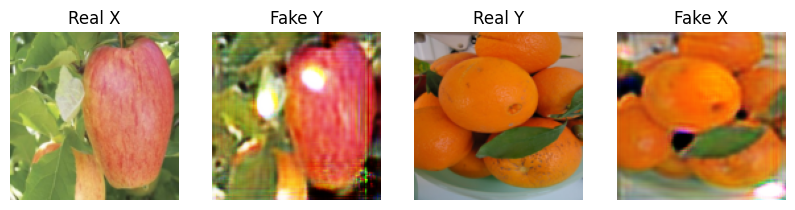

Saving checkpoint for epoch 30 at checkpoints/pytorch/apple2orange
Time taken for epoch 30 is 111.14890027046204 sec



In [44]:
import time

training_steps = np.ceil((min(len(train_data_X), len(train_data_Y)) / BATCH_SIZE)).astype(int)

torch.autograd.set_detect_anomaly(True)
# Remove any existing additional dimensions (if they are size 1)
sample_X = sample_X.squeeze().unsqueeze(0).to(device)
sample_Y = sample_Y.squeeze().unsqueeze(0).to(device)


for epoch in range(1, EPOCHs + 1):
    start = time.time()
    print('Start of epoch %d' % (epoch,))
    # Reset dataloader
    iter_train_image_X = iter(train_image_loader_X)
    iter_train_image_Y = iter(train_image_loader_Y)
    # Initialize losses
    G_XtoY_loss_mean = 0
    G_YtoX_loss_mean = 0
    Dx_loss_mean = 0
    Dy_loss_mean = 0
    for step in range(training_steps):

        real_image_X = next(iter_train_image_X).to(device)
        real_image_Y = next(iter_train_image_Y).to(device)

        # ============================
        # Compute the discriminator loss
        # ============================
        # Generate fake images for discriminators
        # ****START CODE****
        fake_image_Y = G_XtoY(real_image_X)
        fake_image_X = G_YtoX(real_image_Y)
        # ****END CODE****


        # Compute the discriminator loss using the latest fake images
        # ****START CODE****
        Dx_loss = discriminator_loss(real_image_X, fake_image_X)
        Dy_loss = discriminator_loss(real_image_Y, fake_image_Y)

        # ****END CODE****

        # ============================
        # Update discriminators
        # ============================
        # ****START CODE****
        Dx_optimizer.zero_grad()
        Dx_loss.backward()
        Dx_optimizer.step()

        # ****END CODE****

        # ============================
        # Compute the generator loss
        # ============================
        # Generate fake images for generators
        # ****START CODE****
        fake_image_Y = G_XtoY(real_image_X)
        fake_image_X = G_YtoX(real_image_Y)
        # ****END CODE****

        # Compute the generator loss using the latest fake images
        # ****START CODE****
        G_XtoY_loss = generator_loss(fake_image_Y)
        G_YtoX_loss = generator_loss(fake_image_X)
        # ****END CODE****

        # ============================
        # Compute the cycle consistency loss
        # ============================
        # Generate cycled images using the latest fake images
        # ****START CODE****
        cycled_image_X = G_YtoX(fake_image_Y)
        cycled_image_Y = G_XtoY(fake_image_X)
        # ****END CODE****

        # Compute the cycle consistency loss using the latest cycled images
        # ****START CODE****
        cycle_consistency_X_loss = cycle_consistency_loss(real_image_X, cycled_image_X)
        cycle_consistency_Y_loss = cycle_consistency_loss(real_image_Y, cycled_image_Y)
        # ****END CODE****

        # ============================
        # Compute the identity loss
        # ============================
        # Generate identity images using the latest fake images
        # ****START CODE****
        identity_image_X = G_YtoX(real_image_Y)  # Should match real_image_Y
        identity_image_Y = G_XtoY(real_image_X)  # Should match real_image_X
        # ****END CODE****
        # Compute the identity loss using the latest identity images
        # ****START CODE****
        identity_X_loss = identity_loss(real_image_Y, identity_image_X)
        identity_Y_loss = identity_loss(real_image_X, identity_image_Y)
        # ****END CODE****

        # ============================
        # Combine all generator losses
        # ============================
        # ****START CODE****
        G_loss = G_XtoY_loss + G_YtoX_loss + cycle_consistency_X_loss + cycle_consistency_Y_loss + identity_X_loss + identity_Y_loss
        # ****END CODE****
        # ============================
        # Update generators
        # ============================
        # ****START CODE****
        G_XtoY_optimizer.zero_grad()
        G_YtoX_optimizer.zero_grad()
        G_loss.backward()
        G_XtoY_optimizer.step()
        G_YtoX_optimizer.step()
        # ****END CODE****

        # Add losses
        # ****START CODE****
        G_XtoY_loss_mean += G_XtoY_loss.item()
        G_YtoX_loss_mean += G_YtoX_loss.item()
        Dx_loss_mean += Dx_loss.item()
        Dy_loss_mean += Dy_loss.item()
        # ****END CODE****

        if step % 10 == 0:
            print ('.', end='')

    clear_output(wait=True)
    # ============================
    # Print loss values at the end of an epoch
    # ============================
    # ****START CODE****
    print('G_XtoY_loss:', G_XtoY_loss_mean / training_steps)
    print('G_YtoX_loss:', G_YtoX_loss_mean / training_steps)
    print('Dx_loss:', Dx_loss_mean / training_steps)
    print('Dy_loss:', Dy_loss_mean / training_steps)
    # ****END CODE****

    # ============================
    # Using consistent images (sample_X and sample_Y), plot the progress of the training using both generators
    # ============================
    # ****START CODE****

    # 假设 sample_X 和 sample_Y 已经从数据集中获取并进行了预处理
    sample_X = sample_X.to(device)  # 添加批次维度并移动到设备上
    sample_Y = sample_Y.to(device)  # 添加批次维度并移动到设备上

    with torch.no_grad():
        # 使用生成器 G_XtoY 和 G_YtoX 生成假图像
        test_fake_Y = G_XtoY(sample_X).detach().cpu()
        test_fake_X = G_YtoX(sample_Y).detach().cpu()

        # 可视化代码
        plt.figure(figsize=(10, 4))

        # 显示 Real X
        plt.subplot(1, 4, 1)
        plt.title("Real X")
        real_X_image = deprocess(sample_X[0])
        plt.imshow(real_X_image)
        plt.axis('off')

        # 显示 Fake Y
        plt.subplot(1, 4, 2)
        plt.title("Fake Y")
        fake_Y_image = deprocess(test_fake_Y[0])
        plt.imshow(fake_Y_image)
        plt.axis('off')

        # 显示 Real Y
        plt.subplot(1, 4, 3)
        plt.title("Real Y")
        real_Y_image = deprocess(sample_Y[0])
        plt.imshow(real_Y_image)
        plt.axis('off')

        # 显示 Fake X
        plt.subplot(1, 4, 4)
        plt.title("Fake X")
        fake_X_image = deprocess(test_fake_X[0])
        plt.imshow(fake_X_image)
        plt.axis('off')

        plt.show()


    # ****END CODE****

    # ============================
    # Save the checkpoint for every SAVE_EVERY_N_EPOCH epoch
    # ============================
    if epoch % SAVE_EVERY_N_EPOCH == 0:
        # ****START CODE****
        save_training_checkpoint(epoch)
        # ****END CODE****
        print ('Saving checkpoint for epoch {} at {}'.format(epoch,
                                                             checkpoint_path))

    print ('Time taken for epoch {} is {} sec\n'.format(epoch,
                                                      time.time()-start))
    gc.collect()

### 4) Testing

3.4.1. You will now generate images using the trained models, what do you observe from the generated images ? Discuss any anomalies and suggest possible solutions **[3 pts]**.

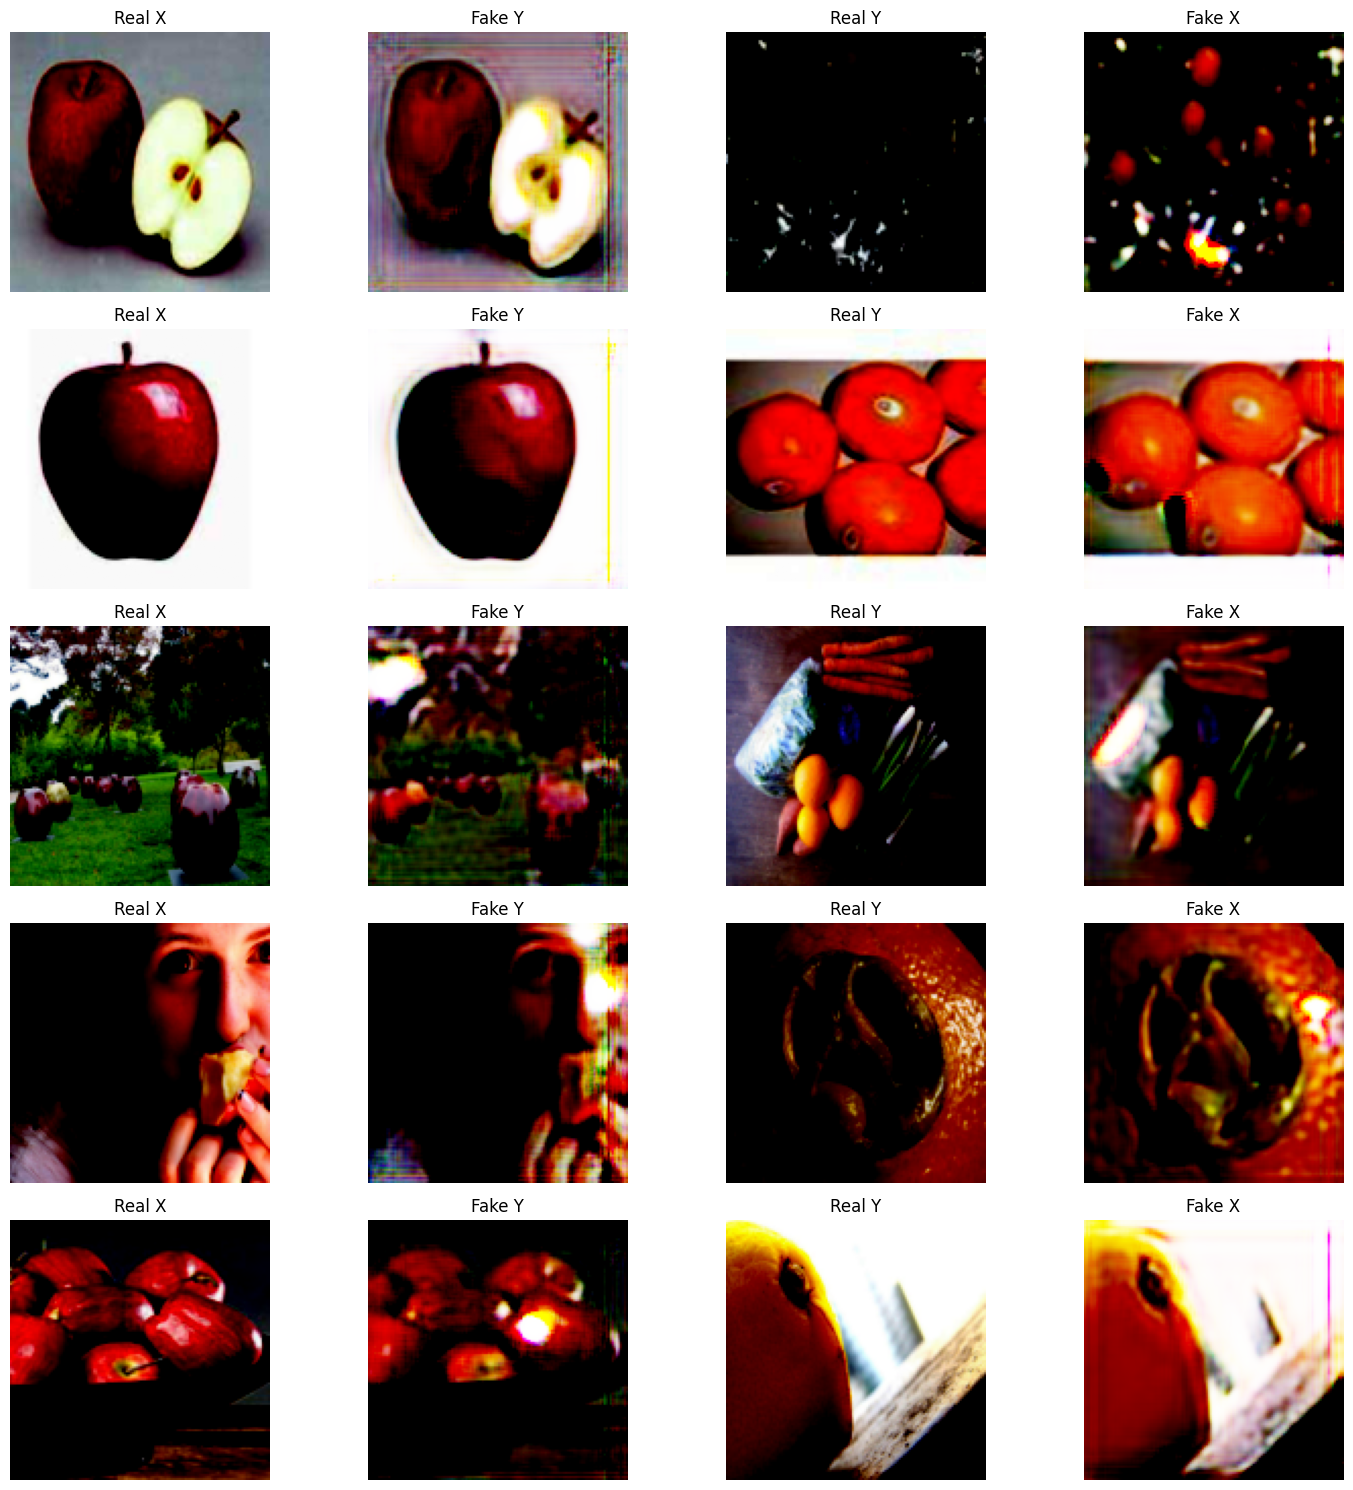

In [50]:
# ****START CODE****
random_seed = 42
torch.manual_seed(random_seed)

# Set the models to evaluation mode
G_XtoY.eval()
G_YtoX.eval()

# Select 5 images for testing
num_test_samples = 5
test_X_indices = random.sample(range(len(test_data_X)), num_test_samples)
test_Y_indices = random.sample(range(len(test_data_Y)), num_test_samples)

# Apply models on test images to generate results
test_X_images = [test_data_X[i] for i in test_X_indices]
test_Y_images = [test_data_Y[i] for i in test_Y_indices]

generated_Y_images = [G_XtoY(x.unsqueeze(0).to(device)).detach().cpu().squeeze(0) for x in test_X_images]
generated_X_images = [G_YtoX(y.unsqueeze(0).to(device)).detach().cpu().squeeze(0) for y in test_Y_images]

# Visualize the results
fig, axes = plt.subplots(num_test_samples, 4, figsize=(15, num_test_samples * 3))
for i in range(num_test_samples):
    # Display real X images
    axes[i, 0].imshow(test_X_images[i].permute(1, 2, 0).numpy())
    axes[i, 0].set_title('Real X')
    axes[i, 0].axis('off')

    # Display generated Y images
    axes[i, 1].imshow(generated_Y_images[i].permute(1, 2, 0).numpy())
    axes[i, 1].set_title('Fake Y')
    axes[i, 1].axis('off')

    # Display real Y images
    axes[i, 2].imshow(test_Y_images[i].permute(1, 2, 0).numpy())
    axes[i, 2].set_title('Real Y')
    axes[i, 2].axis('off')

    # Display generated X images
    axes[i, 3].imshow(generated_X_images[i].permute(1, 2, 0).numpy())
    axes[i, 3].set_title('Fake X')
    axes[i, 3].axis('off')

plt.tight_layout()
plt.show()
# ****END CODE****

### 5) Theory Questions **[6 pts]** (2 pts each):
5.1. What are the key differences between a traditional GAN and a CycleGAN?



Traditional GANs aim to generate realistic data from random noise and require paired data.

CycleGANs, on the other hand, perform image-to-image translation without paired data using cycle consistency and are suitable for tasks like style transfer and domain adaptation.

5.2. How does the architecture of a CycleGAN ensure the preservation of key features in the image translation process?

The architecture of a CycleGAN ensures feature preservation through cycle consistency loss, adversarial training, identity loss, and appropriate network architectures, which collectively encourage realistic and feature-preserving image translation.

5.3. Discuss the role of cycle consistency loss in CycleGAN. Why is it important?

Cycle consistency loss in CycleGAN enforces that translations between two domains are reversible, preserving key features.

It stabilizes training, prevents mode collapse, and facilitates bidirectional learning, improving convergence and generating realistic results.

### 6) Optional Question
6.1. Implement an additional feature in the CycleGAN model or play with the parameters to improve the performance of the model. **[10 extra pts]**

It may include:
*   Changing the backbone architecture for the generator and/or the discriminator (Unet style, ...)
*   Changing the hyperparameters
*   Adding new losses

Illustrate the results you get with these improvements compared to the original implementation. Every implementation choices must be properly justified (in a few lines), or no points will be rewarded.